# A simple tutorial on how to read FITS files

FITS (Flexible Image Transport System) is a file format that is basically the standard for astronomy data. It stores multi-dimensional data cubes as well as meta-data in different extensions. The data you have shouldn't be hard to read, and with a few commands you should be able to use it. You'll need to install the python package `astropy`, which implements a lot of generally useful methods for astronomical data analysis. There's a sub-package `astropy.io.fits` that implements a FITS reader.

I've written what I can below, for more information, look at the [astropy documentation](http://docs.astropy.org/en/stable/io/fits/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from FATS import *
import seaborn
import numpy as np
import pandas as pd
from ipy_table import *

# import seaborn for prettiness of plots; you don't have to do that!
#import seaborn as sns

import astropy.io.fits as fits

//anaconda/envs/py27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# data directory; adjust to wherever you've stored the data
datadir = "nicedata_for_daniela/"

# pick an example file
#example_file = "4u1630-47_FS46_1232ff8e-123304d0_134off_excl_0_0-255.lc"
example_file = "xtej2012+381_FS46_84e4320-84e4e56_excl_0_0-255.lc"

First, we're going to open the fits file and store the results in a variable.

In [67]:
hdulist = fits.open(datadir+example_file)

In [68]:
hdulist

As you can see, the result is a list of three objects, also called extensions. The "HDU" stands for "Header Data Unit". Usually, the first extension contains the header. Let's have a look:

In [69]:
hdu = hdulist[0]
hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CONTENT = 'LIGHT CURVE'        / light curve file                               
ORIGIN  = 'NASA/GSFC/XTE/GOF'  / origin of fits file                            
DATE    = '2016-06-06T22:28:43' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
TELESCOP= 'XTE     '           / Telescope (mission) name                       
INSTRUME= 'PCA     '           / Instrument used for observation                
MJDREFI =                49353 / Integer part of MJDREF                         
MJDREFF = 6.965740740000000E

The header essentially gives you a lot of information about the observation or the file itself, like when it was taken and with what instrument.

For example, you can see the `DATE` that the observation was taken, what kind of data it is (`LIGHT CURVE`, which is astronomy speak for a time series of brightness versus time) and what telescope (`TELESCOP`) it was taken with: XTE, i.e. the Rossi X-ray Timing Explorer.

You can query header data as if they were dictionary attributes. This might come in handy in the future.

In [70]:
hdr = hdu.header
hdr["DATE"]

'2016-06-06T22:28:43'

Let's now find the data, which ought to be in one of the other extensions:

In [71]:
hdu = hdulist[1]

In [72]:
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                 1270 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = '1D      '        

This time, the header tells you what is in this extension in particular. For example, it tells you that there are four columns, `TIME`, `RATE`, `ERROR` and `FRACEXP`. 

You can get the data out by calling the `data` method:

In [73]:
hdu.data

FITS_rec([(305332179.37843037, 2232.0, 47.244047244070863, 1.0),
       (305332180.37843037, 2197.0, 46.872166581031863, 1.0),
       (305332181.37843037, 2239.0, 47.318072657283921, 1.0), ...,
       (305333446.37843037, 2185.0, 46.743983570080971, 1.0),
       (305333447.37843037, 2258.0, 47.518417482066887, 1.0),
       (305333448.37843037, 2272.0, 47.665501151251938, 1.0)], 
      dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f8'), ('ERROR', '>f8'), ('FRACEXP', '>f8')]))

It's a list of tuples. You can get any column out by calling the `field` method:

In [74]:
hdu.data.field("TIME")

array([  3.05332179e+08,   3.05332180e+08,   3.05332181e+08, ...,
         3.05333446e+08,   3.05333447e+08,   3.05333448e+08])

This gives you the time stamps of the time series.

Similarly, the `RATE` keyword contains the brightness of the source, and `ERROR` contains the uncertainty in the brightness measurement.

In [30]:
time = hdu.data.field("TIME")
rate = hdu.data.field("RATE")
error = hdu.data.field("ERROR")

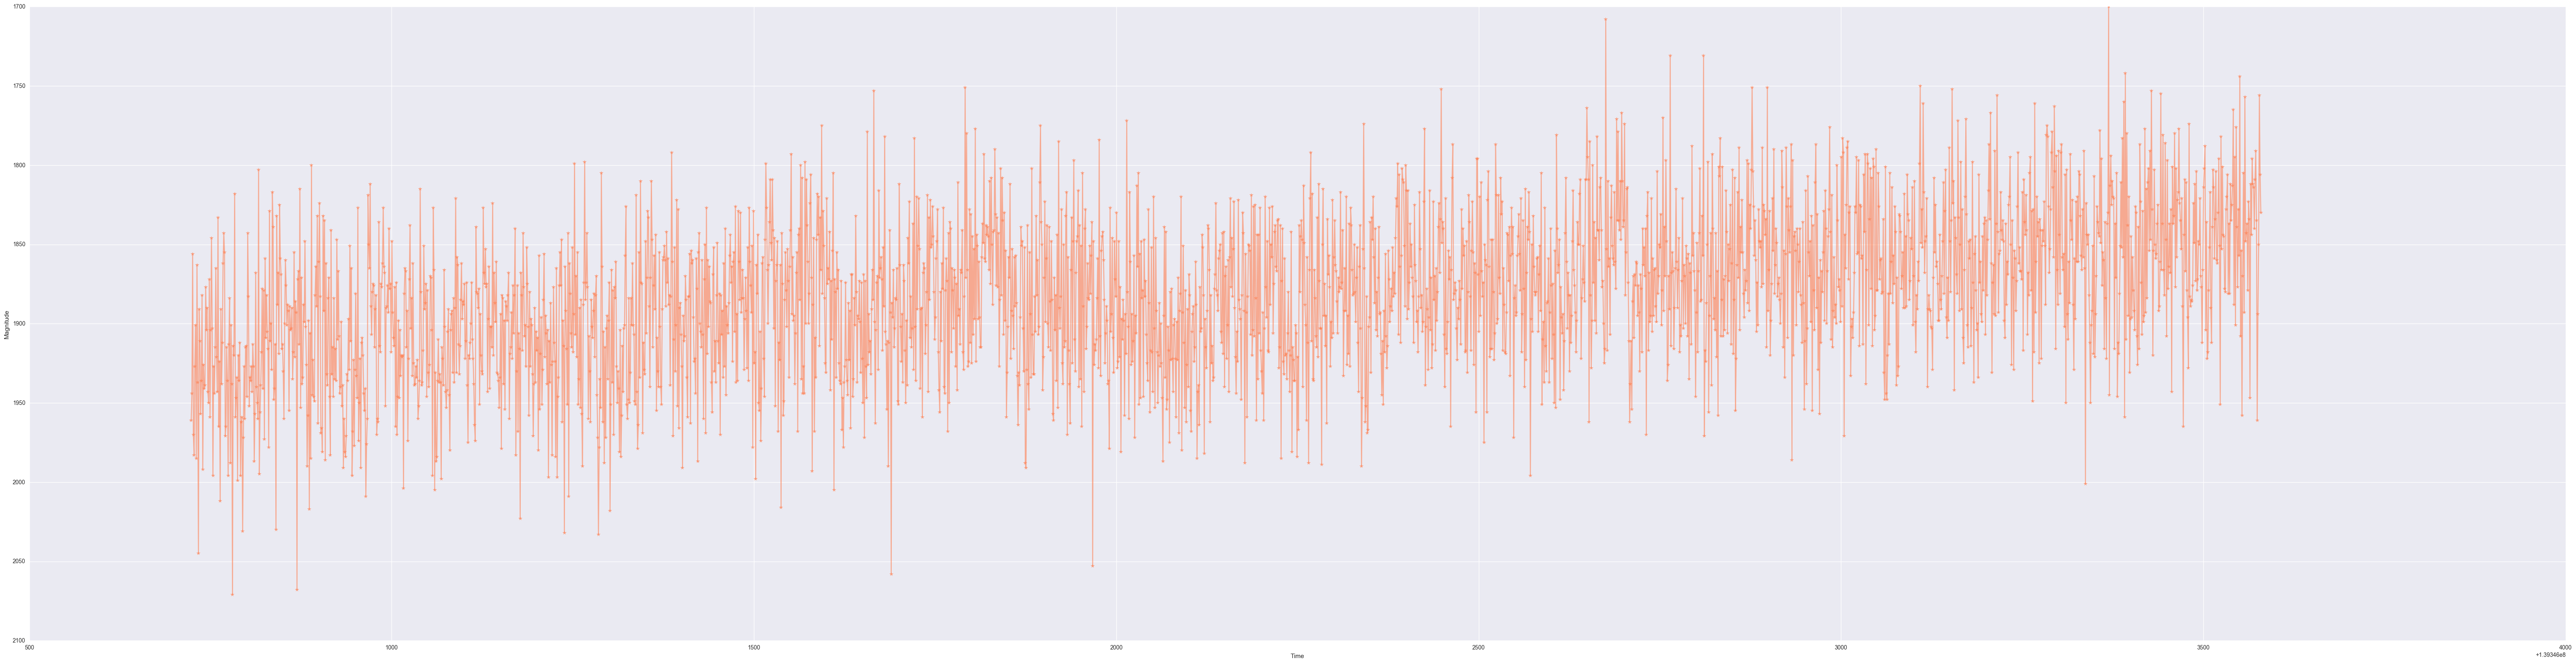

In [62]:
Color = [ 1 ,0.498039, 0.313725];
plt.figure(figsize=(80,20))
p = plt.plot(time, rate, '*-', color=Color, alpha = 0.6)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

#plt.figure(figsize=(12,5))
#plt.errorbar(time, rate, yerr=error, fmt="*")

Okay, cool. A few useful pieces of information:
* Time is measured in seconds since January 1, 1994, at 0:0:0 UTC. I hope this is true for all of the data files. If something weird happens with the times, let me know and I'll take a look!
* The brightness is measured in counts per second. Essentially, X-ray sources are really, really faint. So what the detector does is it measures individual *photons* (light particles). Each photon corresponds to a count (roughly). If you have detected 1000 counts within a time bin, then ~1000 light particles hit the detector from that source in that time. 
* The time resolution of the time series should be 1 second for all of them. I hope this is true. If not, let me know!

And that should be it for now!

In [14]:
FeaturesList = [['Feature','Depends on feature','Input data (besides magnitude)', 'Parameters','Def', 'Bib'],['Amplitude','' ,'','','', 7],['Anderson-Darling test','','','','', 2] ,['Autocor_length','','','Number of lags','100',3],['Beyond1Std','','error','','', 7],['CAR_mean', 'CAR_sigma', 'time, error', '','',6],['CAR_sigma','',  'time, error', '','',6],  ['CAR_tau', 'CAR_sigma', 'time, error', '','',6], ['Color','','mag2','','',3],['Con','','','Consecutive stars',3,3],['Eta_color','','aligned_mag, aligned_mag2, aligned_time','','',4],['Eta_e','','time','','',4],['FluxPercentileRatioMid20','','','','', 7],['FluxPercentileRatioMid35','','','','', 7],['FluxPercentileRatioMid50','','','','', 7],['FluxPercentileRatioMid65','','',' ',' ', 7],['FluxPercentileRatioMid80','','',' ',' ', 7],['Freq1_harmonics_amplitude_0','','time','','', 7],['Freq{i}_harmonics_amplitude_{j}','Freq1_harmonics_amplitude_0','time','','', 7],['Freq{i}_harmonics_rel_phase_{j}','Freq1_harmonics_amplitude_0','time','','', 7],['LinearTrend','','time',' ',' ', 7],['MaxSlope','','time',' ',' ', 7], ['Mean','','',' ',' ',4],['Meanvariance','','',' ',' ',3], ['MedianAbsDev','','',' ',' ', 7],['MedianBRP','','',' ',' ', 7],['PairSlopeTrend','','',' ',' ', 7],['PercentAmplitude','','',' ',' ', 7],['PercentDifferenceFluxPercentile','','',' ',' ', 7],['PeriodLS','','time','Oversampling factor ',6,3],['Period_fit','PeriodLS', 'time ',' ',' ',3],['Psi_CS','PeriodLS','time',' ',' ',4],['Psi_eta','PeriodLS','time',' ',' ',4],['Q31','','',' ',' ',4],['Q31_color','','aligned_mag, aligned_mag2',' ',' ',4],['Rcs','','',' ',' ',3],['Skew','','',' ',' ', 7], ['SlottedA_length','','time','Slot size T (days)',4,'?'],['SmallKurtosis','','',' ',' ', 7],['Std','' ,'','','', 7],['StetsonJ','','aligned_mag, aligned_mag2, aligned_error, aligned_error2','','', 7],['StetsonK','','error','','', 7], ['StetsonK_AC','SlottedA_length','','','',3],['StetsonL','','aligned_mag, aligned_mag2, aligned_error, aligned_error2','','',3],['VariablityIndex','','','','',3]]
make_table(FeaturesList)
apply_theme('basic')
set_global_style(float_format='%0.3E')

Feature,Depends on feature,Input data (besides magnitude),Parameters,Def,Bib
Amplitude,,,,,7
Anderson-Darling test,,,,,2
Autocor_length,,,Number of lags,100,3
Beyond1Std,,error,,,7
CAR_mean,CAR_sigma,"time, error",,,6
CAR_sigma,,"time, error",,,6
CAR_tau,CAR_sigma,"time, error",,,6
Color,,mag2,,,3
Con,,,Consecutive stars,3,3
Eta_color,,"aligned_mag, aligned_mag2, aligned_time",,,4


In [37]:
ts = np.array([rate,time,error])
a = FeatureSpace(Data=['magnitude','time','error'], featureList = None, excludeList = ['interp1d','Color','Eta_color','Q31_color','StetsonJ','StetsonL'])
a=a.calculateFeature(ts)

#pd.DataFrame(a)

FATS/FeatureFunctionLib.py:542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  F_40_60 = sorted_data[F_60_index] - sorted_data[F_40_index]
FATS/FeatureFunctionLib.py:543: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  F_5_95 = sorted_data[F_95_index] - sorted_data[F_5_index]
FATS/FeatureFunctionLib.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  F_325_675 = sorted_data[F_675_index] - sorted_data[F_325_index]
FATS/FeatureFunctionLib.py:565: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  F_5_95 = sorted_data[F_95_index] - sorted_data[F_5_index]
FATS/FeatureFunctionLib.py:586: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  F_25_75 = sorted_dat

In [48]:
dic = a.result(method = 'dict')

In [51]:
df = pd.DataFrame.from_dict(dic, orient = 'index')
df

,0
Psi_eta,1.606297e+00
PercentAmplitude,1.004251e-01
MaxSlope,2.450000e+02
SmallKurtosis,5.908163e-03
StetsonK,8.013378e-01
Meanvariance,2.647193e-02
Rcs,1.854751e-01
FluxPercentileRatioMid65,5.838509e-01
Freq3_harmonics_amplitude_0,7.210793e+01
Freq3_harmonics_amplitude_1,4.502276e+00


In [53]:
df.isnull().sum()

0    0
dtype: int64